## Доверительные интервалы

### Правило 3 сигм

Пусть X имеет некоторое распределение с математическим ожиданием EX = a и конечной дисперсией Var(X) = σ^2 < ∞. 

С помощью неравенства Чебышёва покажите, с какой вероятностью эта случайная величина лежит в отрезках [a − 2σ, a + 2σ] и [a − 3σ, a + 3σ]. 

Сравните полученные вероятности с соответствующими вероятностями для стандартного нормального распределения N (0, 1). Какой вывод можно сделать?

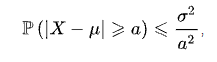

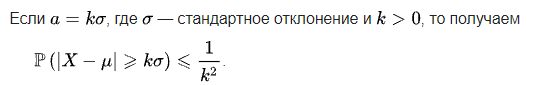

Т.к. необходимо найти вероятность в пределах отгрезка - знаки в другую сторону

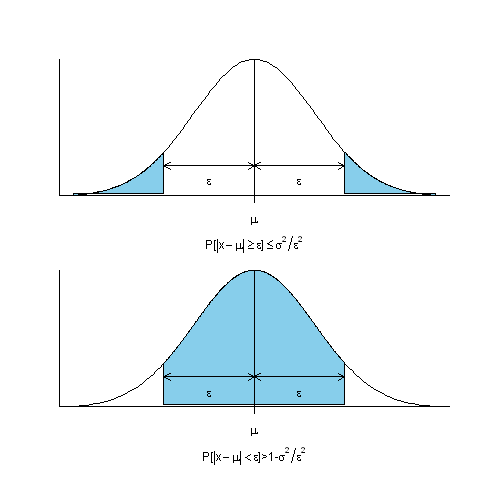

In [ ]:
P(|X - μ| <= a) >= 1 - (σ^2/ a^2)

Через k:
P(|X - μ| <= kσ) >= 1 - (1/ k^2)


В задаче М = а, Var = σ^2,   тогда вормула в конкретной задаче выглядит:
P(|X - a| <= kσ) >= 1 - (1/ k^2)  или неравенство относительно X (+ выносим σ^2):
P( a-k <= X <= a+k ) >= 1 - (σ^2/ k^2)


# 1. k=2:
P(a-2σ <= X <= a+2σ) >= 1 - (σ^2/ 4σ^2)   P >= 3/4  или 0.75

# 2. k=3:
ε = a + 3σ - a + 3σ = 6σ
P(a-3σ <= X <= a+3σ) >= 1 - (σ^2/ 9σ^2)   P >= 8/9  или 0.89

In [ ]:
# Для стандартного нормального распределения N (0, 1):
# Приблизительно 99,7% всех значений лежат в пределе трех сигм от математического ожидания, около 95% — в пределах двух сигм.


# Если случайная величина распределена нормально, то абсолютная величина ее отклонения от математического ожидания не превосходит утроенного 
# среднего квадратического отклонения.

# Если распределение изучаемой случайной величины неизвестно, но условие, указанное в приведенном правиле, выполняется, 
# то есть основание предполагать, что изучаемая величина распределена нормально; в противном случае она не распределена нормально.

### Сравнение дов. интервалов

Рассмотрим нормальное распределение N(μ,σ^2) с неизвестными параметрами μ ∈ R и σ^2 > 0. 

В этой задаче мы численно сравним следующие доверительные интервалы для параметра μ:
1. теоретический
2. на основе параметрического бутстрэпа
3. на основе непараметрического бутстрэпа. 

Для этого:
1. сгенерируйте неизвестный параметр μ из равномерного распределения на [10,20] и σ — из равномерного распределения на [1, 2];
2. сгенерируйте выборку из нормального распределения N (μ, σ^2) размера n = 50;
3. постройте доверительные интервалы 1), 2), 3) уровня доверия 1 − α, α=0.05;
4. сравните длины полученных доверительных интервалов;
5. проведите этот эксперимент на 10000 выборках; с какой частотой μ попадает в полученные доверительные интервалы?


In [ ]:
import numpy as np 
from scipy import stats 

np.random.seed(15) # фиксируем seed

In [ ]:
# 1
mu = np.random.uniform(10,20) 
sigma = np.random.uniform(1,2) # std
print("Значение mu равно", mu)
print("Значение sigma равно", sigma)

# 2
n = 50 # размер выборки 
sample = np.random.normal(mu, sigma, size=n)


# print("Sample:", sample)

Значение mu равно 18.488176972685785
Значение sigma равно 1.1788959249209985


In [ ]:
# 3
alpha = 0.05 # параметр ошибки

# 0.05/2 = 0.025 =>  q = 1-0.025 = 0.975
x_q = stats.norm.ppf(q=0.975)

#  ppf - для извлечения значения случайной величины, которое с заданной вероятностью не меньше всех других значений (квантиль, процентиль)
print("Ppf:", x_q)

# Теоретический доверительный интервал:
std = np.std(sample)

CI_Theoretical = [
    np.mean(sample) - stats.norm.ppf(1-alpha/2)*std/np.sqrt(n), 
    np.mean(sample) + stats.norm.ppf(1-alpha/2)*std/np.sqrt(n)]

print("Теоретический ДИ равен", CI_Theoretical)

Ppf: 1.959963984540054
Теоретический ДИ равен [18.0511984256395, 18.72027285907213]


In [ ]:
#  На основе параметрического бутстрэпа:
 
 # Параметры для бутстрэпа
number_of_bootstrap_samples = 10 # количество бутстрэп-выборок
size_of_bootstrap_samples = 20 # размер бутстрэп-выборок

# Оцениваем неизвестные параметры  
mean = np.mean(sample) 
std = np.std(sample)
print('Mean =', mean, 'Std =', std)

# Генерируем выборку из распределения N(sample_mean, sigma)
bootstrap_samples = np.random.normal(mean,std,
                                     size=[number_of_bootstrap_samples,
                                           size_of_bootstrap_samples]) 

# Считаем среднее для каждой выборки 
bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
print()
# Вычисляем параметрический бутстрэп доверительный интервал
CI_Bootstrap_Parametric = [
    np.quantile(bootstrap_estimates,alpha/2), 
    np.quantile(bootstrap_estimates,1-alpha/2)]

print("ДИ на основе парметрического бутстрэпа равен", CI_Bootstrap_Parametric)

Mean = 18.385735642355815 Std = 1.2069279658467393

ДИ на основе парметрического бутстрэпа равен [18.054305062475613, 18.591694956675415]


In [ ]:
#  На основе непараметрического бутстрэпа:

number_of_bootstrap_samples = 10 # количество бутстрэп-выборок
size_of_bootstrap_samples = 20 # размер бутстрэп-выборок

# Генерируем выборку из распределения N(bootstrap_mean, sigma)
bootstrap_samples = np.random.choice(sample,
                        size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 

# Считаем среднее для каждой выборки 
bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)

# Вычисляем непараметрический бутстрэп доверительный интервал
CI_Bootstrap_Nonparametric = [
    np.quantile(bootstrap_estimates,alpha/2), 
    np.quantile(bootstrap_estimates,1-alpha/2)]

print("ДИ на основе (непарметрического) бутстрэпа равен", CI_Bootstrap_Nonparametric)

ДИ на основе (непарметрического) бутстрэпа равен [18.163000965222494, 19.11734894679038]


In [ ]:
# 4 сравние длины полученных доверительных интервалов:

print("Длина теоретического ДИ: ", CI_Theoretical[1]-CI_Theoretical[0])
print("Длина ДИ на основе парметрического бустрэпа: ", CI_Bootstrap_Parametric[1]-CI_Bootstrap_Parametric[0])
print("Длина ДИ на основе непарметрического бустрэпа: ", CI_Bootstrap_Nonparametric[1]-CI_Bootstrap_Nonparametric[0])

Длина теоретического ДИ:  0.6690744334326268
Длина ДИ на основе парметрического бустрэпа:  0.5373898941998014
Длина ДИ на основе непарметрического бустрэпа:  0.954347981567885


In [ ]:
# эксперимент на 10000 выборках

N_samples = 10000 # количество "экспериентов" по вычислению доверительных интервалов

theoretical = np.zeros(N_samples) # результаты для теоретического доверительного интервала
parametric_bootstrap = np.zeros(N_samples) # результаты для параметрического бутстрэпа 
nonparametric_bootstrap = np.zeros(N_samples) # результаты для непараметрического бутстрэпа 

In [ ]:
# Вычисляем теоретический доверительный интервал

def Theoretical(sample,alpha):
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample)
    
    return [
        mean - stats.norm.ppf(1-alpha/2)*std/np.sqrt(n), 
        mean + stats.norm.ppf(1-alpha/2)*std/np.sqrt(n)]

In [ ]:
# Вычисляем доверительный интервал на основе параметрического бутстрэпа

def Parametric_bootstrap(sample,alpha,
                         number_of_bootstrap_samples,size_of_bootstrap_samples):
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample)

    bootstrap_samples = np.random.normal(mean,std,
            size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
    bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
    return [
        np.quantile(bootstrap_estimates,alpha/2), 
        np.quantile(bootstrap_estimates,1-alpha/2)]

In [ ]:
# Вычисляем доверительный интервал на основе непараметрического бутстрэпа

def Nonparametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples):
    bootstrap_samples = np.random.choice(sample,size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
    bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
    return [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]

In [ ]:
# Проведем N_samples экспериментов
for i in range(N_samples):
    sample = np.random.normal(mu, sigma, size=n)
    # теоретические интервалы
    CI_Theoretical = Theoretical(sample,alpha)
    theoretical[i] = (mu >= CI_Theoretical[0]) and (mu <= CI_Theoretical[1])
    
    CI_parametric_bootstrap = Parametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples)
    parametric_bootstrap[i] = (mu >= CI_parametric_bootstrap[0]) and (mu <= CI_parametric_bootstrap[1])
    
    CI_nonparametric_bootstrap = Nonparametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples)
    nonparametric_bootstrap[i] = (mu >= CI_nonparametric_bootstrap[0]) and (mu <= CI_nonparametric_bootstrap[1])

In [ ]:
print("Частота попадания истинного параметра в ДИ:")
print("- для теоретического ДИ", np.mean(theoretical))
print("- для параметрического бутстрэп ДИ", np.mean(parametric_bootstrap))
print("- для непараметрического бутстрэп ДИ", np.mean(nonparametric_bootstrap))

Частота попадания истинного параметра в ДИ:
- для теоретического ДИ 0.9407
- для параметрического бутстрэп ДИ 0.912
- для непараметрического бутстрэп ДИ 0.9116


### banner
В файле Banner_small.npy даны две выборки из распределения Бернулли. Они соответствуют кликам по двум рекламным баннерам в Интернете. 

Постройте доверительные интервалы для частоты кликов (то есть параметра «успеха»). 

Сравните асимптотический дов. итервал и дов. интервал на основе непараметрического бутстрэпа для обоих баннеров.

Как думаете, можно ли сказать, что один из баннеров лучше, чем другой? 

Проверьте свой вывод на выборке большего размера, которая записана в файл Banner_large.npy

*Выводы тут*

In [ ]:
# Код ниже

In [ ]:
import numpy as np

In [ ]:
! wget https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/Banner_small.npy
! wget https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/Banner_large.npy

--2021-11-24 18:29:25--  https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/Banner_small.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8128 (7.9K) [application/octet-stream]
Saving to: ‘Banner_small.npy’

Banner_small.npy    100%[===================>]   7.94K  --.-KB/s    in 0s      

2021-11-24 18:29:25 (80.3 MB/s) - ‘Banner_small.npy’ saved [8128/8128]

--2021-11-24 18:29:25--  https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/Banner_large.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [ ]:
XL = np.load('Banner_large.npy')
XS = np.load('Banner_small.npy')
XS.shape, XL.shape

((2, 500), (2, 100000))

In [ ]:
alpha = 0.05 # параметр ошибки

In [ ]:
import statsmodels.stats.proportion

# XS
n = 500 # размер выборки
number_of_bootstrap_samples = 1000 # количество бутстрэп-выборок
size_of_bootstrap_samples = 500 # размер бутстрэп-выборок

print("Оценка вероятности успеха, выборкa 1: ",np.mean(XS[0]))
print("Оценка вероятности успеха, выборка 2: ",np.mean(XS[1]))
print()

CI_Normal_1 = statsmodels.stats.proportion.proportion_confint(sum(XS[0]), n, alpha, method = 'normal')
CI_Normal_2 = statsmodels.stats.proportion.proportion_confint(sum(XS[1]), n, alpha, method = 'normal')
print("Асимптотический ДИ на основе ЦПТ, баннер 1:", CI_Normal_1)
print("Асимптотический ДИ на основе ЦПТ, баннер 2:", CI_Normal_2)
print()

# Генерируем выборки:
bootstrap_samples_1 = np.random.choice(XS[0], size=[number_of_bootstrap_samples,size_of_bootstrap_samples])
bootstrap_samples_2 = np.random.choice(XS[1], size=[number_of_bootstrap_samples,size_of_bootstrap_samples])
# Считаем среднее для каждой выборки для каждого барннера:
bootstrap_estimates_1 = np.apply_along_axis(np.mean, 1, bootstrap_samples_1)
bootstrap_estimates_2 = np.apply_along_axis(np.mean, 1, bootstrap_samples_2)
# Вычисляем непараметрический бутстрэп доверительный интервал
CI_Bootstrap_Nonparametric_1 = [
    np.quantile(bootstrap_estimates_1, alpha/2), 
    np.quantile(bootstrap_estimates_1, 1-alpha/2)]
CI_Bootstrap_Nonparametric_2 = [
    np.quantile(bootstrap_estimates_2, alpha/2), 
    np.quantile(bootstrap_estimates_2, 1-alpha/2)]

print("ДИ на основе (непарметрического) бутстрэпа, баннер 1:", CI_Bootstrap_Nonparametric_1)
print("ДИ на основе (непарметрического) бутстрэпа, баннер 2:", CI_Bootstrap_Nonparametric_2)
print()

# Дополнительно:
CI_Wilson_1 = statsmodels.stats.proportion.proportion_confint(sum(XS[0]), n, alpha, method = 'wilson')
CI_Wilson_2 = statsmodels.stats.proportion.proportion_confint(sum(XS[1]), n, alpha, method = 'wilson')
print("Доверительный интервал Уилсона, баннер 1: ", CI_Wilson_1)
print("Доверительный интервал Уилсона, баннер 2:  ", CI_Wilson_2)

Оценка вероятности успеха, выборкa 1:  0.002
Оценка вероятности успеха, выборка 2:  0.006

Асимптотический ДИ на основе ЦПТ, баннер 1: (0.0, 0.005916006079184627)
Асимптотический ДИ на основе ЦПТ, баннер 2: (0.0, 0.012769115216425226)

ДИ на основе (непарметрического) бутстрэпа, баннер 1: [0.0, 0.006]
ДИ на основе (непарметрического) бутстрэпа, баннер 2: [0.0, 0.014]

Доверительный интервал Уилсона, баннер 1:  (0.00035313639455927543, 0.01124070670514676)
Доверительный интервал Уилсона, баннер 2:   (0.002042596271960238, 0.017490252104053382)


In [ ]:
# Можно предположить, что второй баннер лучше

In [ ]:
# XL
n = 100000 # размер выборки
number_of_bootstrap_samples = 2000 # количество бутстрэп-выборок
size_of_bootstrap_samples = 1000 # размер бутстрэп-выборок

print("Оценка вероятности успеха, выборкa 1: ",np.mean(XL[0]))
print("Оценка вероятности успеха, выборка 2: ",np.mean(XL[1]))
print()

CI_Normal_1 = statsmodels.stats.proportion.proportion_confint(sum(XL[0]), n, alpha, method = 'normal')
CI_Normal_2 = statsmodels.stats.proportion.proportion_confint(sum(XL[1]), n, alpha, method = 'normal')
print("Асимптотический ДИ на основе ЦПТ, баннер 1:", CI_Normal_1)
print("Асимптотический ДИ на основе ЦПТ, баннер 2:", CI_Normal_2)
print()

# Генерируем выборки:
bootstrap_samples_1 = np.random.choice(XL[0], size=[number_of_bootstrap_samples,size_of_bootstrap_samples])
bootstrap_samples_2 = np.random.choice(XL[1], size=[number_of_bootstrap_samples,size_of_bootstrap_samples])
# Считаем среднее для каждой выборки для каждого барннера:
bootstrap_estimates_1 = np.apply_along_axis(np.mean, 1, bootstrap_samples_1)
bootstrap_estimates_2 = np.apply_along_axis(np.mean, 1, bootstrap_samples_2)
# Вычисляем непараметрический бутстрэп доверительный интервал
CI_Bootstrap_Nonparametric_1 = [
    np.quantile(bootstrap_estimates_1, alpha/2), 
    np.quantile(bootstrap_estimates_1, 1-alpha/2)]
CI_Bootstrap_Nonparametric_2 = [
    np.quantile(bootstrap_estimates_2, alpha/2), 
    np.quantile(bootstrap_estimates_2, 1-alpha/2)]

print("ДИ на основе (непарметрического) бутстрэпа, баннер 1:", CI_Bootstrap_Nonparametric_1)
print("ДИ на основе (непарметрического) бутстрэпа, баннер 2:", CI_Bootstrap_Nonparametric_2)
print()

# Дополнительно:
CI_Wilson_1 = statsmodels.stats.proportion.proportion_confint(sum(XL[0]), n, alpha, method = 'wilson')
CI_Wilson_2 = statsmodels.stats.proportion.proportion_confint(sum(XL[1]), n, alpha, method = 'wilson')
print("Доверительный интервал Уилсона, баннер 1: ", CI_Wilson_1)
print("Доверительный интервал Уилсона, баннер 2:  ", CI_Wilson_2)

Оценка вероятности успеха, выборкa 1:  0.00547
Оценка вероятности успеха, выборка 2:  0.00645

Асимптотический ДИ на основе ЦПТ, баннер 1: (0.005012858448137027, 0.005927141551862973)
Асимптотический ДИ на основе ЦПТ, баннер 2: (0.005953838785243252, 0.006946161214756748)

ДИ на основе (непарметрического) бутстрэпа, баннер 1: [0.001, 0.01]
ДИ на основе (непарметрического) бутстрэпа, баннер 2: [0.002, 0.011]

Доверительный интервал Уилсона, баннер 1:  (0.005031469130789156, 0.005946523742342226)
Доверительный интервал Уилсона, баннер 2:   (0.005972445015040758, 0.006965472568389962)


In [ ]:
# Второй баннер кажется более кликабельным

## Критерии однородности 

В каждом следующем упражнении необходимо воспользоваться всеми изученными критериями, которые можно использовать в данных постановках. 

Кроме этого, решения необходимо сопроводить краткими комментариями к Вашим действиям и выводами, которые Вы сделали на основе анализа.

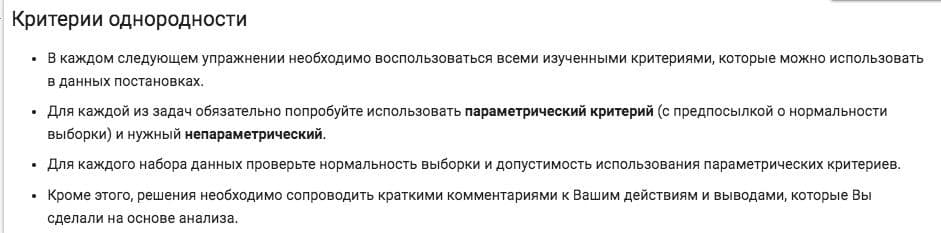

### anorexia

В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?


*Выводы тут*

In [ ]:
# Код ниже

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/anorexia.txt', sep='\t')
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [ ]:
df.shape

(29, 2)

#### Решение (вариант № 1) - непараиметрический

In [ ]:
import scipy
from scipy.stats import wilcoxon

scipy.stats.wilcoxon(df['Before'], df['After'])

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

**Таблица критических значений T-критерия Вилкоксона:** 
https://statpsy.ru/wilkoxon/tablica-willcoxon/

*   Если расчетное (эмпирическое) значение Тэмп. меньше табличного Ткр. или равно 
ему, то признается статистическая значимость изменений показателя в типичную сторону (принимается альтернативная гипотеза). 

Достоверность различий тем выше, чем меньше значение Т.
Если Тэмп. больше Ткр., принимается нулевая гипотеза об отсутствии статистической значимости изменений показателя.
*   Если Тэмп. больше Ткр., принимается нулевая гипотеза об отсутствии статистической значимости изменений показателя.

In [ ]:
T_imp = 131.5
T_crit = 140

# Сравниваем Тэмп. с Ткр., который при уровне значимости p=0.05 и n=29 равен 140:
'The therapy was effective.'if T_imp <= T_crit else 'The therapy wasn`t effective.'

# Различия статистически значимы

'The therapy was effective.'

#### Решение (вариант № 2) - параметрический

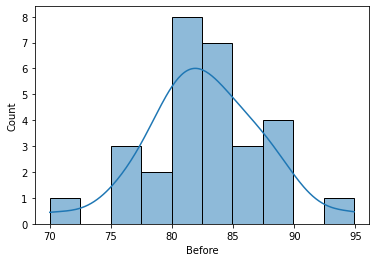

In [ ]:
import seaborn as sns

sns.histplot(df['Before'], kde=True, bins = 10);

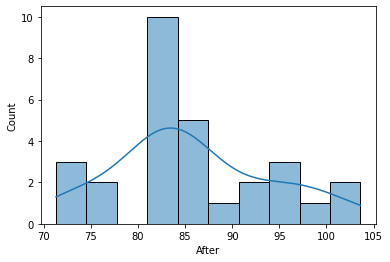

In [ ]:
sns.histplot(df['After'], kde=True, bins = 10);

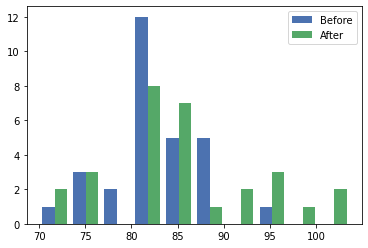

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
plt.hist([df['Before'], df['After']], label=['Before', 'After'], bins = 10)
plt.legend(loc='upper right')
plt.show()

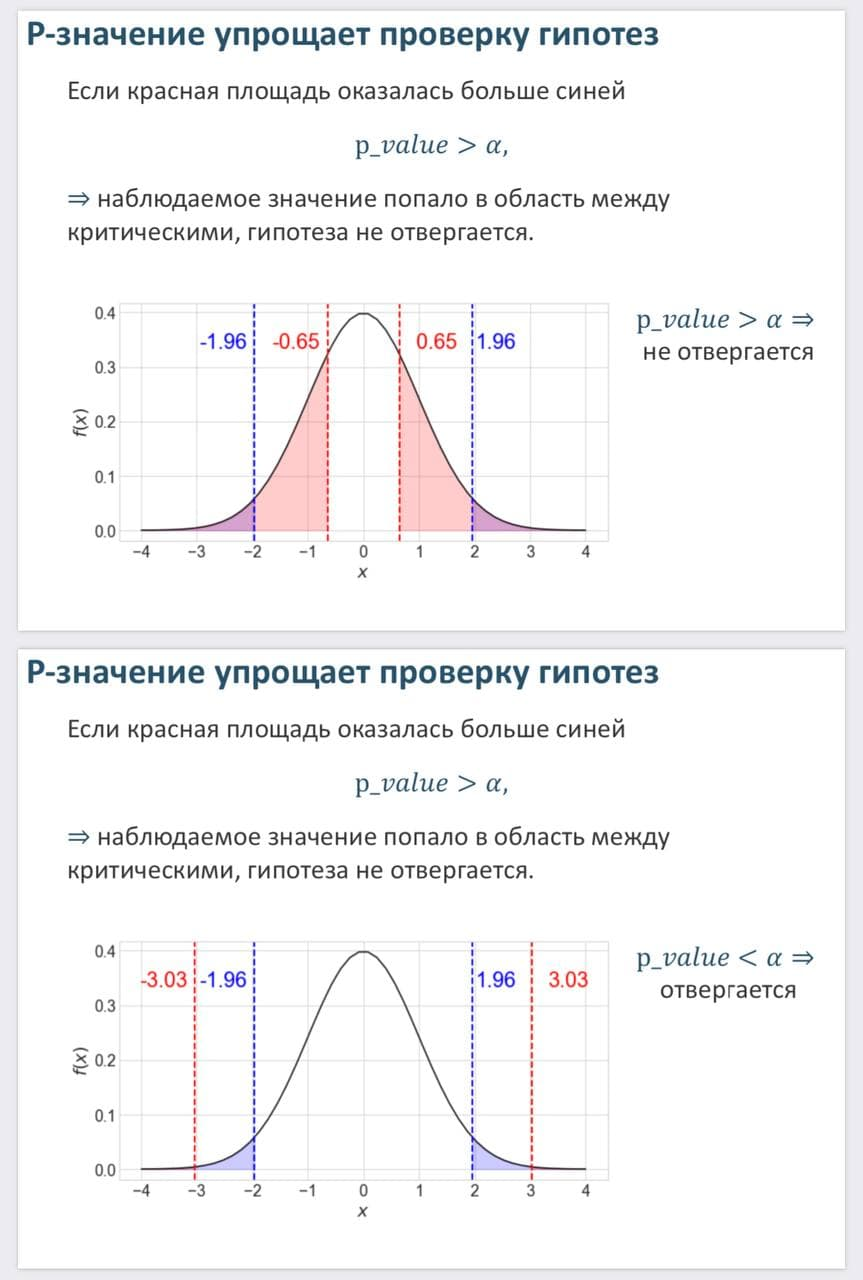

Проверяемая гипотеза называется основной (нулевой) и обозначается Н0

a = 0.05

In [ ]:
# тест Колмогорова

# Ho = two distributions are identical, F(x)=G(x) for all x; 
# Ha = that they are not identical

from scipy import stats

mu, sigma = df['Before'].mean(), df['Before'].std(ddof=1)
stats.kstest(df['Before'], 'norm', args=(mu, sigma)) # Гипотеза о нормальности не отвергается

KstestResult(statistic=0.13068734822609923, pvalue=0.6832974046260625)

In [ ]:
mu, sigma = df['After'].mean(), df['After'].std(ddof=1)
stats.kstest(df['After'], 'norm', args=(mu, sigma)) # Гипотеза о нормальности не отвергается

KstestResult(statistic=0.15978425031808619, pvalue=0.40999285761502785)

In [ ]:
# Ho = the two distributions are identical, F(x)=G(x) for all x; 
# Ha = the alternative is that they are not identical.

# Гипотеза об одинаковом распределении не отвергается:
stats.ks_2samp(df['Before'], df['After'])

Ks_2sampResult(statistic=0.27586206896551724, pvalue=0.22213483447265486)

In [ ]:
# t-критерий Стьюдента для связанных выборок:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

#  the null hypothesis that 2 related or repeated samples have identical average (expected) values

# If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis 
# of identical average scores. 
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

stats.ttest_rel(df['Before'], df['After']) # Нулевая гипотеза отвергается - различия статистически значимы, терапия была эффективной.

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

#### Решение (вариант № 3) - на основе доверит. интервала

In [ ]:
from scipy import stats

alpha = 0.05

# Вычисляем теоретический доверительный интервал

n = len(df['Before'])
mu = np.mean(df['Before'])
sigma = np.std(df['Before'])

CI_Theoretical = [
    mu - stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n), 
    mu + stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n)]

print("Теоретический доверительный интервал равен", CI_Theoretical)

low = mu - stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n)
upper = mu + stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n)

Теоретический доверительный интервал равен [80.95678023325956, 84.42253011156805]


In [ ]:
# через сравнение с интервалом

def effect (data):
  res = []

  for i in data:
    if low <= i <= upper:
      res.append(1)
    else:
      res.append(0)
  return res

In [ ]:
df['Res'] = effect (df['After'])
share = sum(df['Res']) / len(df['Res'])
share  # доля человек, которая осталась в доверительном интервале до лечения составляет 30% - можно сказать, что лечение было эффективно

0.3448275862068966

### seattle
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


*Выводы тут*

In [ ]:
# Код ниже

df = pd.read_csv('https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/seattle.txt', sep='\t')
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [ ]:
v1 = df[df['Year'] == 2001]['Price'] # данные по стоимости за 2001 г
v2 = df[df['Year'] == 2002]['Price'] # данные по стоимости за 2002 г

#### Решение (вариант№ 1) непараметрический

In [ ]:
# Mann-Whitney

# Ho = the distribution underlying sample x is the same as the distribution underlying sample y
# Ha = 'two-sided': the distributions are not equal, i.e. F(u) ≠ G(u) for at least one u

stats.mannwhitneyu(v1, v2, alternative='two-sided') # Ho гипотеза не отвергается. Цены за год не изменились.

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

#### Решение (вариант № 2) - параметрический

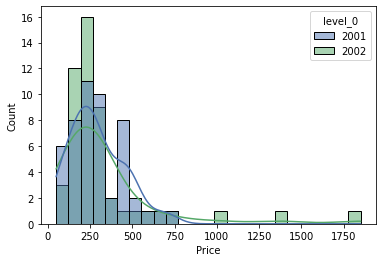

In [ ]:
sns.histplot(data=pd.concat([v1, v2], axis = 0, keys = ['2001','2002']).reset_index(), kde=True, bins = 25,
             x ='Price', hue = 'level_0');
sns.set(rc={"figure.figsize":(8, 7)}) 

In [ ]:
# тест Колмогорова

# Ho = two distributions are identical, F(x)=G(x) for all x; 
# Ha = that they are not identical

# 2001
mu, sigma = v1.mean(), v1.std(ddof=1)
stats.kstest(v1, 'norm', args=(mu, sigma)) # Гипотеза о нормальности не отвергается

KstestResult(statistic=0.10199767623856881, pvalue=0.6616412025406231)

In [ ]:
# 2002
mu, sigma = v2.mean(), v2.std(ddof=1)
stats.kstest(v2, 'norm', args=(mu, sigma)) # Гипотеза о нормальности отвергается. Возможно из-за того, что выборка слишком мала.

KstestResult(statistic=0.2927691699402488, pvalue=0.000272082474651694)

In [ ]:
# Ho = the two distributions are identical, F(x)=G(x) for all x; 
# Ha = the alternative is that they are not identical.

# Гипотеза об одинаковом распределении не отвергается:
stats.ks_2samp(v1, v2)

Ks_2sampResult(statistic=0.14, pvalue=0.7166468440414822)

In [ ]:
# T-test

#  Ho = 2 independent samples have identical average (expected) values

stats.ttest_ind(v1, v2) # Ho гипотеза не отвергается. Цены за год не изменились.

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42235167114691463)

### methylphenidate
В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.



*Выводы тут*

In [ ]:
# Код ниже

df = pd.read_csv('https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/methylphenidate.txt', sep=' ')
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [ ]:
df.shape

(24, 2)

#### Решение (вариант№ 1) непараметрический

In [ ]:
# Ho = P(X>Y)=0.5
# Ha = P(X>Y)≠0.5

from statsmodels.stats.descriptivestats import sign_test

sign_test(df.Placebo, df.Methylphenidate)  # Ho гипотеза не отвергается. Есть эффект от применения препарата.

(-5.0, 0.06391465663909912)

In [ ]:
# Wilcoxon

scipy.stats.wilcoxon(df.Placebo, df.Methylphenidate)

WilcoxonResult(statistic=48.5, pvalue=0.003707013753450903)

In [ ]:
T_imp = 48.5
T_crit = 91

# Сравниваем Тэмп. с Ткр., который при уровне значимости p=0.05 и n=24 равен 91:
'Есть эффект от применения препарата.'if T_imp <= T_crit else 'Эффекта от применения препарата нет.'

# Различия статистически значимы

'Есть эффект от применения препарата.'

#### Решение (вариант № 2) - параметрический

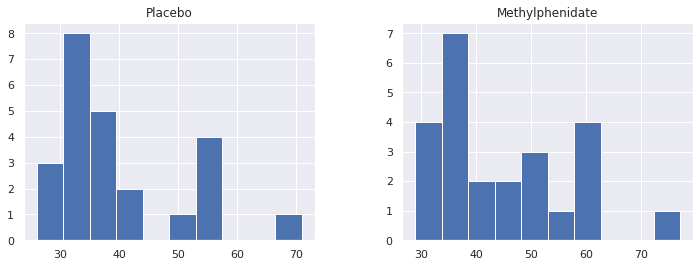

In [ ]:
df.hist(figsize=(12,4), bins=10);

In [ ]:
tab_1 = df.Placebo
tab_2 = df.Methylphenidate

In [ ]:
# тест Колмогорова

# Ho = two distributions are identical, F(x)=G(x) for all x; 
# Ha = that they are not identical

# Placebo
mu, sigma = tab_1.mean(), tab_1.std(ddof=1)
stats.kstest(tab_1, 'norm', args=(mu, sigma)) # Гипотеза о нормальности не отвергается

KstestResult(statistic=0.2548394516353422, pvalue=0.07328693674046188)

In [ ]:
# Methylphenidate
mu, sigma = tab_2.mean(), tab_2.std(ddof=1)
stats.kstest(tab_2, 'norm', args=(mu, sigma)) # Гипотеза о нормальности не отвергается.

KstestResult(statistic=0.16528820400202715, pvalue=0.48454237277130535)

In [ ]:
# Ho = the two distributions are identical, F(x)=G(x) for all x; 
# Ha = the alternative is that they are not identical.

stats.ks_2samp(tab_1, tab_2)

# Гипотеза об одинаковом распределении не отвергается.

Ks_2sampResult(statistic=0.25, pvalue=0.4490368220409109)

In [ ]:
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

stats.shapiro(df.Placebo-df.Methylphenidate) # критерий Шапиро-Уилка не отвергают гипотезу о нормальности данных

(0.9798052906990051, 0.8922504186630249)

In [ ]:
# t-критерий Стьюдента для связанных выборок:

stats.ttest_rel(df.Placebo, df.Methylphenidate) # Нулевая гипотеза отвергается, эффект от применения препарата есть.

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

### mtcars
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон); 
2. cyl — количество цилиндров мотора; 3) disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач; 11) carb — количество карбюраторов.

- Влияет ли тип двигателя на расход топлива? 
- А тип коробки передач?

*Выводы тут*

In [ ]:
# Код ниже
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.columns.tolist()

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [ ]:
#  Судя по тепловой карте ниже:

# vs - mpg: Да, тип двигателя влияет на расход топлива.
# am - mpg: Тип коробки передач почти так же влияет на расход топлива как и тип двигателя.

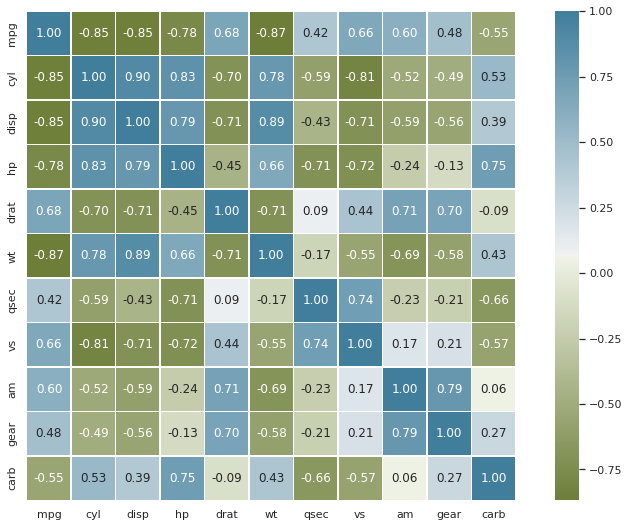

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,9))

corr = df.corr()

heatmap = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,230,as_cmap=True), square=True)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('mpg',axis=1)
y = df['mpg']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=50)

model = LinearRegression()
model.fit(Xtrain, ytrain)

print('intercept:', model.intercept_)
print('coef:', model.coef_)

intercept: 38.94634352727835
coef: [-1.59726643e+00 -2.67344709e-04 -9.65901813e-03  1.92829172e+00
 -1.85071566e+00 -2.19623303e-01 -1.60379814e+00 -1.45710998e+00
 -6.21076979e-01 -5.33346073e-01]


In [ ]:
# pip install pingouin

In [ ]:
import pingouin as pg

X = df.drop('mpg',axis=1)
y = df['mpg']

lm = pg.linear_regression(X, y)
# lm.loc[[7,8]]
lm

# По столбцу P-val можно определить значитмость признака. Если значение менньше 0.05 - признак значимый.

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,12.303374,18.717884,0.657306,0.518124,0.869016,0.806642,-26.622597,51.229346
1,cyl,-0.111440,1.045023,-0.106639,0.916087,0.869016,0.806642,-2.284686,2.061805
2,disp,0.013335,0.017858,0.746758,0.463489,0.869016,0.806642,-0.023801,0.050472
3,hp,-0.021482,0.021769,-0.986841,0.334955,0.869016,0.806642,-0.066752,0.023788
4,drat,0.787111,1.635373,0.481304,0.635278,0.869016,0.806642,-2.613834,4.188055
5,wt,-3.715304,1.894414,-1.961189,0.063252,0.869016,0.806642,-7.654954,0.224346
6,qsec,0.821041,0.730845,1.123413,0.273941,0.869016,0.806642,-0.698834,2.340916
7,vs,0.317763,2.104509,0.150991,0.881423,0.869016,0.806642,-4.058802,4.694328
8,am,2.520227,2.056651,1.225404,0.233990,0.869016,0.806642,-1.756812,6.797266
9,gear,0.655413,1.493260,0.438914,0.665206,0.869016,0.806642,-2.449991,3.760817


In [ ]:
# import statsmodels.api as sm
# from scipy import stats

# X = df.drop('mpg',axis=1)
# X = sm.add_constant(X)
# y = df['mpg']

# model = sm.OLS(y, X)
# results = model.fit()
# print(results.summary())

In [ ]:
# Пробуем удалять наименее значимые признаки, т.е. с наибольшим значением 'pval':

df = df.drop(['cyl', 'carb', 'drat', 'gear', 'disp'], axis=1)

X = df.drop('mpg',axis=1)
y = df['mpg']

lm = pg.linear_regression(X, y)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,18.497586,10.848614,1.705064,0.100105,0.858072,0.830778,-3.802059,40.797231
1,hp,-0.018143,0.014619,-1.241060,0.225665,0.858072,0.830778,-0.048193,0.011907
2,wt,-3.145462,1.016523,-3.094334,0.004675,0.858072,0.830778,-5.234956,-1.055969
3,qsec,0.730445,0.598835,1.219776,0.233499,0.858072,0.830778,-0.500479,1.961369
4,vs,0.354424,1.762555,0.201086,0.842196,0.858072,0.830778,-3.268559,3.977408
5,am,2.908447,1.425182,2.040754,0.051550,0.858072,0.830778,-0.021057,5.837952


In [ ]:
# Судя по значениям pval самыми значимыми признаками являются: 
# wt - вес (тысяч фунтов);
# am - тип коробки передач (0 = автоматическая, 1 = ручная);

# vs - тип двигателя (0 = V-образный, 1 = рядный);  - Наименее значимый признак